<a href="https://colab.research.google.com/github/parmarjh/-GANS/blob/master/whisper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ⚙️ Installing packages and depedencies!

In [ ]:
!apt update 
!apt install ffmpeg

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Building dependency tree       
Reading state infor

In [ ]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116
!pip install git+https://github.com/openai/whisper.git 
!pip install diffusers==0.2.4
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-g_ib6gd7
  Running command git clone -q https://github.com/openai/whisper.git /tmp/pip-req-build-g_ib6gd7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 🧐 Authorization process - Stable Diffusion

In [ ]:
from google.colab import output
from huggingface_hub import notebook_login
output.enable_custom_widget_manager()
notebook_login()

In [ ]:
from torch.cuda import is_available

assert is_available(), 'GPU is not available.'

## 🎤 Speech to text - Whisper!

**🔑 Note**: *Don't forget about your audio file.*

In [ ]:
import whisper

model = whisper.load_model('small')

audio = whisper.load_audio('prompt.m4a')
audio = whisper.pad_or_trim(audio)

mel = whisper.log_mel_spectrogram(audio).to(model.device)

options = whisper.DecodingOptions()
result = whisper.decode(model, mel, options)

prompt = result.text

prompt += ' hd, 4k resolution, cartoon style'
print(prompt)

fiery unicorn in a rainbow world hd, 4k resolution, cartoon style


## 🎨 Text to image

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(
    'CompVis/stable-diffusion-v1-4',
    revision='fp16',
    torcj_dtype=torch.float16,
    use_auth_token=True
)

pipe = pipe.to("cuda")

In [ ]:
with torch.autocast('cuda'):
    image = pipe(prompt)['sample'][0]  

0it [00:00, ?it/s]

## 🖼️ Let's display results!

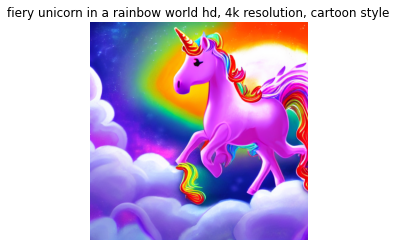

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(prompt)
plt.axis('off')
plt.savefig('result.jpg')
plt.show()